# Computational Social Choice - Assignment 3
- Yorick Juffer - s1993623
- Ioana Cojocaru - s5002117

## Libraries

In [1]:
import random
import copy
import csv
import pandas as pd
import matplotlib.pyplot as plt

## Candidate List

In [2]:
candidate = {
    1: "Jackie Kasabach",
    2: "Jack Johnson",
    3: "Adam Frisch",
    4: "Torre",
    5: "Michael Behrendt",
    6: "Jason Lasser",
    7: "Michael Wampler",
    8: "Derek Johnson",
    9: "Brian D. Speck",
    10: "Write In 1",
    11: "Write In 2"
}

## Functions

### Load Data
- Loads the data.txt file. 
- The output profile is a list, of which each element contains a vote (profile[n][0]) and preferences (profile[n][1:]).
- Each voters preferences are made unique so (profile[n][0]=1), so they can be easily manipulated. 
- If there is a tie ([1, 2]), both recieve a vote.

In [3]:
def load(path): 
    profile = []

    with open(path, 'r') as file:
        for line in file:
            line = line.strip()

            # for each line, split the votes and preferences
            if line:
                votes_str, preferences_str = line.split(':')
                votes = int(votes_str)

                for _ in range(votes):

                    preferences = []
                    tied_preferences = []
                    tie = False

                    # add the preferences to the profile
                    # split the tied votes and add them as a list to the profile
                    for pref in preferences_str.split(','):
                        pref = pref.strip()

                        if "}" in pref:
                            pref = pref.replace('}', '')
                            tied_preferences.append(int(pref))
                            preferences.append(tied_preferences)
                            tie = False

                        elif "{" in pref or tie:
                            pref = pref.replace('{', '')
                            tied_preferences.append(int(pref))
                            tie = True
                        else:
                            preferences.append(int(pref))

                    # add the votes and preferences to the profile
                    profile.append(preferences)

    return profile

# load data and convert
file_path = 'data.txt'
original_profile = load(file_path)
profile_length = len(original_profile)

### Single Transferable Vote
- This function takes a profile and a list of candidates and returns the winner of the election using the STV social choice function. 
- The profile ranges alternatives from 1 to 11, but this function uses a 0-based index to represent the candidates.

In [4]:
def single_transferable_vote(profile, candidates, print_status=False):
    eliminated_candidates = []

    round = 0
    while len(eliminated_candidates) < len(candidates):

        # reset the round
        round += 1
        tally = [0] * len(candidates)
        for index in eliminated_candidates:
            tally[index] = None
        eliminate = []

        # tally the votes for each candidate
        for pref in profile:

            n = 0
            # search for the candidate with the highest preference that has not been eliminated
            searching = True
            while searching:

                # if the preference is a tie 
                if isinstance(pref[n], list):
                    m = 0

                    # for each tied preference, check if the candidate has been eliminated otherwise tally the votes
                    for _ in pref[n]:

                        if pref[n][m] - 1 not in eliminated_candidates:
                            candidate = pref[n][m] - 1
                            tally[candidate] += 1

                        m += 1
                        if m >= len(pref[n]):
                            searching = False

                # check if the candidate has been eliminated
                elif pref[n] - 1 not in eliminated_candidates:
                    candidate = pref[n] - 1
                    tally[candidate] += 1
                    searching = False

                n += 1
                if n >= len(pref):
                    searching = False

        # eliminate the candidate with the lowest votes
        lowest_votes = min(value for value in tally if value is not None)
        eliminate = [i for i, value in enumerate(tally) if value == lowest_votes]
        eliminated_candidates.extend(eliminate)

        # find the winner
        highest_votes = max(value for value in tally if value is not None)
        winner = [i for i, value in enumerate(tally) if value == highest_votes]

        if print_status:
            print("---ROUND {}---".format(round))
            print("Tally: {}".format(tally))
            print("Eliminated {}:".format(eliminate))
            print()

    return winner, highest_votes

### Manipulate Functions
- Take in a P and output P'

In [5]:
# Change target to the first position candidate of n voters.
def manipulate(profile, n, target):

    # adjust the target to the correct index
    target += 1

    # filter the profile to ignore if first preference is 8 or the target, and if the target is in the preferences. 
    # sample n voters from the filtered profile
    filtered_indices = [index for index, item in enumerate(profile) if not item[0] == 8 and not item[0] == target and target in item]
    rng = random.sample(filtered_indices, min(n, len(filtered_indices)))

    # for each voter, move the target to the first preference
    for index in rng:    
        pref = profile[index]

        for alt in pref:
            if isinstance(alt, list):
                if target in alt:
                    alt.remove(target)
                    pref.insert(0, target)
                    profile[index] = pref
            else:
                if target in pref:
                    pref.remove(target)
                    pref.insert(0, target)
                    profile[index] = pref
    
    return profile

## Results
- 1: "Jackie Kasabach",
- 2: "Jack Johnson",
- 3: "Adam Frisch",
- 4: "Torre",
- 5: "Michael Behrendt",
- 6: "Jason Lasser",
- 7: "Michael Wampler",
- 8: "Derek Johnson",
- 9: "Brian D. Speck",
- 10: "Write In 1",
- 11: "Write In 2" 

The entire script uses a 0-index counting system.

In [6]:
profile_length = len(original_profile)

# FIND THE WINNER
original_results = single_transferable_vote(original_profile, candidate, print_status=True)
for result in original_results[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], original_results[1]))

---ROUND 1---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [247, 456, 415, 385, 352, 27, 94, 463, 38, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [247, 460, 416, 394, 355, None, 96, 466, 41, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [253, 464, 422, 396, 365, None, 100, 474, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [259, 478, 433, 416, 383, None, None, 494, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 535, 467, 458, 445, None, None, 547, None, None, None]
Eliminated [4]:

---ROUND 7---
Tally: [None, 620, 557, 552, None, None, None, 671, None, None, None]
Eliminated [3]:

---ROUND 8---
Tally: [None, 801, 672, None, None, None, None, 815, None, None, None]
Eliminated [2]:

---ROUND 9---
Tally: [None, 908, None, None, None, None, None, 1227, None, None, None]
Eliminated [1]:

---ROUND 10---
Tally: [None, None, None, None, None, None, None, 1685, None, None, None]
Eliminated [7]:

Derek Johns

## Searchs to Find P'

In [7]:
# run the impact of target manipulations across parameters
def grid_search(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None

    for target in range(len(candidate)): 
        n = n_saved
        while n > 0:
            print("SEARCHING: n = {}, i = {}, target = {}, ".format(n, i, target))
            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = manipulate(x, n, target)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
            n -= 1
        
    return results, profile_smallest, n_smallest, target_best

# run the impact of target manipulations across parameters
def binary_search(profile, original_results, n, i):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None
    
    for target in range(len(candidate)): 

        n = n_saved
        n_max = n_saved
        n_min = 0

        while abs(n_max - n_min) > 1:

            print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, target = {}, ".format(n, n_max, n_min, i, target))
            found = False

            for _ in range(i):
                x = copy.deepcopy(profile)
                manipulated_profile = manipulate(x, n, target)
                output = single_transferable_vote(manipulated_profile, candidate)
                results.append([original_results[0] == output[0], n, i, target])

                if not original_results[0] == output[0]:
                    if n < n_smallest:
                        n_smallest = n
                        target_best = target
                        profile_smallest = copy.deepcopy(manipulated_profile)
                    found = True

            if found:
                n_max = n
                n = round(n_max - (n_max - n_min)/2)
            else:
                n_min = n
                n = round(n_min + (n_max - n_min)/2)
            
    return results, profile_smallest, n_smallest, target_best

# find a more specific solution
def binary_search_specific(profile, original_results, n, i, target):

    results = []
    n_saved = n
    n_smallest = n
    target_best = None
    profile_smallest = None
    
    n = n_saved
    n_max = n_saved
    n_min = 0

    while abs(n_max - n_min) > 1:

        print("SEARCHING: n = {}, n_max = {}, n_min = {}, i = {}, target = {}, ".format(n, n_max, n_min, i, target))
        found = False

        for _ in range(i):
            x = copy.deepcopy(profile)
            manipulated_profile = manipulate(x, n, target)
            output = single_transferable_vote(manipulated_profile, candidate)
            results.append([original_results[0] == output[0], n, i, target])

            if not original_results[0] == output[0]:
                if n < n_smallest:
                    n_smallest = n
                    target_best = target
                    profile_smallest = copy.deepcopy(manipulated_profile)
                found = True

        if found:
            n_max = n
            n = round(n_max - (n_max - n_min)/2)
        else:
            n_min = n
            n = round(n_min + (n_max - n_min)/2)
            
    return results, profile_smallest, n_smallest, target_best

## Analysis

### GRID SEARCH
-  **SEARCHES VERY SLOWLY**
- Adjust n to select the starting n to search from. 
- n will decrement by 1 after each set of iterations is completed.
- Adjust i to vary the amount of iterations spent on each value of n.
- Higher i means more sampling, but slower speed.

In [ ]:
n = profile_length
i = 3

# run the grid search
results_grid, profile_grid, n_grid, target_grid = grid_search(original_profile, original_results, n, i)
csv_file_path = 'results_grid.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_grid)

print("Results saved to {}".format(csv_file_path))

In [9]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_grid, candidate[target_grid+1]))

# Test the profile
election_grid = single_transferable_vote(profile_grid, candidate, print_status=True)
for result in election_grid[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_grid[1]))

P': SMALLEST n: 87 TARGET: Michael Behrendt

---ROUND 1---
Tally: [234, 432, 393, 369, 439, 25, 90, 463, 32, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [234, 432, 393, 369, 439, 25, 90, 463, 32, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [234, 436, 394, 378, 441, None, 92, 466, 34, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [240, 439, 399, 380, 449, None, 94, 473, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [245, 453, 410, 399, 466, None, None, 490, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 505, 443, 438, 526, None, None, 540, None, None, None]
Eliminated [3]:

---ROUND 7---
Tally: [None, 638, 508, None, 617, None, None, 630, None, None, None]
Eliminated [2]:

---ROUND 8---
Tally: [None, 700, None, None, 735, None, None, 868, None, None, None]
Eliminated [1]:

---ROUND 9---
Tally: [None, None, None, None, 1041, None, None, 1034, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, None, 1618, None, None, None, N

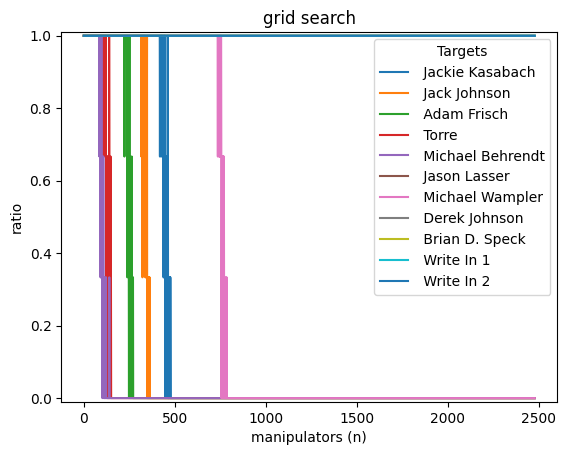

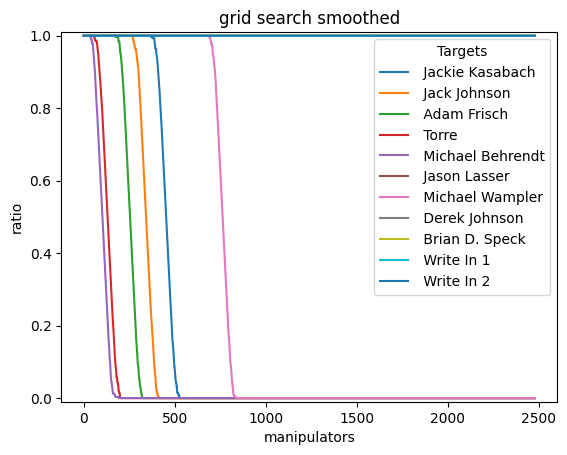

In [10]:
df = pd.read_csv('results_grid.csv')

# PLOT THE RESULTS
proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target+1)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')
plt.xlabel('manipulators (n)')
plt.ylabel("ratio")
plt.ylim(-0.01, 1.01)
plt.legend(title='Targets')
plt.savefig('results_grid.png')
plt.title('grid search')


# SMOOTH THE PLOT
smoothed_proportions = proportions.rolling(window=100, center=True, min_periods=1).mean()

plt.figure()
for target in smoothed_proportions.columns:
    target_name = candidate[int(target+1)]
    plt.plot(smoothed_proportions.index, smoothed_proportions[target], label=f' {target_name}')

plt.xlabel('manipulators')
plt.ylabel("ratio")
plt.ylim(-0.01, 1.01)
plt.legend(title='Targets')
plt.title('grid search smoothed')
plt.savefig('results_grid_smoothed.png')  # Save the smoothed plot as a PNG file


### BINARY SEARCH
-  **SEARCHES MUCH FASTER**
- Adjust n to select the starting n to search from.
- n tends towards the middle of a n_max (where elections changed) and n_min (where elections didnt change).
- Adjust i to vary the amount of iterations spent on each value of n.
- Higher i means more sampling, but slower speed.
- Looking at the plot from grid and binary search, binary approximates the grid search quite well.
- The benefit of using binary search is that i can be increased while keeping search time lower.

In [ ]:
n = profile_length
i = 100

# run the binary search
results_binary, profile_binary, n_binary, target_binary = binary_search(original_profile, original_results, n, i)
csv_file_path = 'results_binary.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_binary)

print("Results saved to {}".format(csv_file_path))

In [12]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_binary, candidate[target_binary+1]))

# Test the profile
election_binary = single_transferable_vote(profile_binary, candidate, print_status=True)
for result in election_binary[0]:
    print("{} wins with {} votes! \n".format(candidate[result+1], election_binary[1]))

P': SMALLEST n: 74 TARGET: Michael Behrendt

---ROUND 1---
Tally: [232, 433, 398, 370, 426, 26, 93, 463, 36, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [232, 433, 398, 370, 426, 26, 93, 463, 36, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [232, 437, 399, 379, 429, None, 95, 465, 39, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [238, 441, 405, 381, 438, None, 99, 472, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [244, 455, 416, 401, 456, None, None, 491, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 512, 449, 441, 511, None, None, 539, None, None, None]
Eliminated [3]:

---ROUND 7---
Tally: [None, 648, 514, None, 609, None, None, 622, None, None, None]
Eliminated [2]:

---ROUND 8---
Tally: [None, 710, None, None, 734, None, None, 859, None, None, None]
Eliminated [1]:

---ROUND 9---
Tally: [None, None, None, None, 1045, None, None, 1030, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, None, 1618, None, None, None, N

Text(0.5, 1.0, 'binary search')

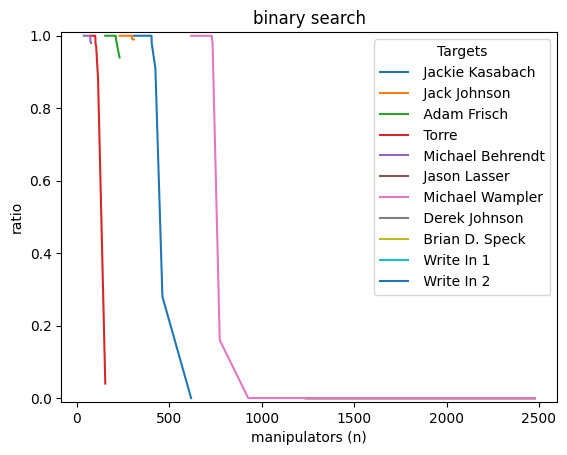

In [13]:
df = pd.read_csv('results_binary.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target+1)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')
plt.xlabel('manipulators (n)')
plt.ylabel("ratio")
plt.ylim(-0.01, 1.01)
plt.legend(title='Targets')
plt.savefig('results_binary.png')
plt.title('binary search')

### BINARY SEARCH SPECIFIC
- Runs a binary search for a specific target candidate.
- Adjust n to select the starting n to search from.
- n tends towards the middle of a n_max (where elections changed) and n_min (where elections didnt change).
- Adjust i to vary the amount of iterations spent on each value of n.
- Higher i means more sampling, but slower speed.
- The benefit of using binary search is that i can be increased while keeping search time lower.

In [14]:
n = n_binary
i = 10000
target = target_binary

# run the binary search
results_binary_specific, profile_binary_specific, n_binary_specific, target_binary_specific = binary_search_specific(original_profile, original_results, n, i, target)
csv_file_path = 'results_binary_specific.csv'

# # Write the results to the CSV file
with open(csv_file_path, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['match', 'n', 'i', 'target'])
    writer.writerows(results_binary_specific)

print("Results saved to {}".format(csv_file_path))

SEARCHING: n = 74, n_max = 74, n_min = 0, i = 10000, target = 4, 
SEARCHING: n = 37, n_max = 74, n_min = 0, i = 10000, target = 4, 
SEARCHING: n = 56, n_max = 74, n_min = 37, i = 10000, target = 4, 
SEARCHING: n = 65, n_max = 74, n_min = 56, i = 10000, target = 4, 
SEARCHING: n = 60, n_max = 65, n_min = 56, i = 10000, target = 4, 
SEARCHING: n = 58, n_max = 60, n_min = 56, i = 10000, target = 4, 
SEARCHING: n = 59, n_max = 60, n_min = 58, i = 10000, target = 4, 
Results saved to results_binary_specific.csv


In [15]:
print("P': SMALLEST n: {} TARGET: {}\n".format(n_binary, candidate[target_binary_specific+1]))

# Test the profile
election_binary_specific = single_transferable_vote(profile_binary_specific, candidate, print_status=True)
for result in election_binary_specific[0]:
    print("{} wins with {} votes! \n".format(candidate[result + 1], election_binary_specific[1]))

P': SMALLEST n: 74 TARGET: Michael Behrendt

---ROUND 1---
Tally: [234, 439, 400, 377, 411, 26, 92, 463, 35, 0, 0]
Eliminated [9, 10]:

---ROUND 2---
Tally: [234, 439, 400, 377, 411, 26, 92, 463, 35, None, None]
Eliminated [5]:

---ROUND 3---
Tally: [234, 443, 401, 386, 413, None, 94, 466, 38, None, None]
Eliminated [8]:

---ROUND 4---
Tally: [240, 447, 407, 388, 423, None, 96, 473, None, None, None]
Eliminated [6]:

---ROUND 5---
Tally: [246, 460, 418, 407, 441, None, None, 491, None, None, None]
Eliminated [0]:

---ROUND 6---
Tally: [None, 514, 452, 448, 500, None, None, 538, None, None, None]
Eliminated [3]:

---ROUND 7---
Tally: [None, 651, 518, None, 596, None, None, 628, None, None, None]
Eliminated [2]:

---ROUND 8---
Tally: [None, 714, None, None, 725, None, None, 864, None, None, None]
Eliminated [1]:

---ROUND 9---
Tally: [None, None, None, None, 1039, None, None, 1036, None, None, None]
Eliminated [7]:

---ROUND 10---
Tally: [None, None, None, None, 1618, None, None, None, N

Text(0.5, 1.0, 'binary search specific')

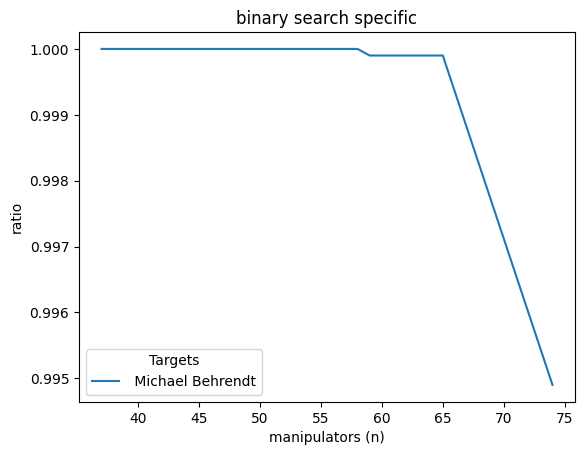

In [21]:
df = pd.read_csv('results_binary_specific.csv')

proportions = df.groupby(['n', 'target'])['match'].mean().unstack()

plt.figure()
for target in proportions.columns:
    target_name = candidate[int(target+1)]
    plt.plot(proportions.index, proportions[target], label=f' {target_name}')
plt.xlabel('manipulators (n)')
plt.ylabel("ratio")
plt.legend(title='Targets')
plt.savefig('results_binary_specific.png')
plt.title('binary search specific')